# Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/1-notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

# Import data

### Sheet 1 of the Excel file with the filename information, we need to match the IDs in the sheet with the IDs in the other sheet, problem there don't have the same form !

### We create a new column *ID_split_HCC* (suffix of *Id Aliquot*) to compare IDs in the other sheet

In [6]:
all_samples = pd.read_excel(pwd + 'data/prepare_HCC_data/IDs_samples.xlsx', sheet_name='Sheet1')
all_samples['ID_split_HCC'] = [elt.split('-')[0].split('_')[-1] for elt in all_samples['Id Aliquot']]
all_samples

,Id Aliquot,CaseCtrl,Id Metabo,ID_split_HCC
0,71219179-s2#C,Non-case,NaN,71219179
1,71220023-s2#C,Incident,NaN,71220023
2,81________7792-s1#C,Non-case,NaN,7792
3,81________8367-s1#C,Incident,NaN,8367
4,72479995-s2#C,Non-case,LivCan_001,72479995
...,...,...,...,...
689,81________6991-s1#C,Non-case,NaN,6991
690,52565741-s2#C,Non-case,LivCan_543,52565741
691,52568391-s2#C,Incident,LivCan_544,52568391
692,61077734-s2#C,Non-case,LivCan_545,61077734


In [7]:
all_samples.dtypes.value_counts()

object    4
dtype: int64

### Sheet 2 of the Excel file with the information on paired samples, type of tumor and their IDs

### We create a new column *ID_split_HCC* (suffix of *Idepic_Bio*) to compare IDs in the other sheet

In [ ]:
HCC_samples = pd.read_excel(pwd + 'data/prepare_HCC_data/IDs_samples.xlsx', sheet_name='Sheet2')
HCC_samples['ID_split_HCC'] = [elt.split('_')[-1] for elt in HCC_samples['Idepic_Bio']]
HCC_samples

In [ ]:
HCC_samples.dtypes.value_counts()

### Pandas merge function (that we will use below) converts int values to floats if NaNs are introduced in the column (because of outer join for example). So we keep trace of initial int columns to re-convert them after the merging

In [7]:
HCC_samples.dtypes[HCC_samples.dtypes == 'int64']

Match_Caseset    int64
dtype: object

In [8]:
int_col = list(HCC_samples.dtypes[HCC_samples.dtypes == 'int64'].index)
int_col

['Match_Caseset']

## Merge both sheets based on splited IDs (columns *ID_split_HCC*)

In [9]:
merge = pd.merge(all_samples, HCC_samples, how='outer', on='ID_split_HCC')
merge

,Id Aliquot,CaseCtrl,Id Metabo,ID_split_HCC,Idepic,Match_Caseset,Case_HCC_Wide,Idepic_Bio,Typ_Tumo
0,71219179-s2#C,Non-case,NaN,71219179,NaN,NaN,NaN,NaN,NaN
1,71220023-s2#C,Incident,NaN,71220023,NaN,NaN,NaN,NaN,NaN
2,81________7792-s1#C,Non-case,NaN,7792,NaN,NaN,NaN,NaN,NaN
3,81________8367-s1#C,Incident,NaN,8367,NaN,NaN,NaN,NaN,NaN
4,72479995-s2#C,Non-case,LivCan_001,72479995,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
889,NaN,NaN,NaN,2481930386,82__2481930386,273.0,No,82__2481930386,NaN
890,NaN,NaN,NaN,2481930390,82__2481930390,273.0,Yes,82__2481930390,HCC/
891,NaN,NaN,NaN,2481960134,82__2481960134,267.0,No,82__2481960134,NaN
892,NaN,NaN,NaN,2481960343,82__2481960343,532.0,Yes,82__2481960343,HCC/


In [10]:
merge.dtypes.value_counts()

object     8
float64    1
dtype: int64

### We can see that Match_Caseset column has been converted from int to float

In [11]:
for col in int_col:
    
    print(f'Column {col} is type {merge[col].dtype}')
    print(f'Conversion...')
    merge[col] = pd.to_numeric(merge[col],errors='coerce').astype(pd.Int64Dtype())
    print(f'Column {col} is type {merge[col].dtype}')
    print()

Column Match_Caseset is type float64
Conversion...
Column Match_Caseset is type Int64



In [12]:
merge.dtypes.value_counts()

object    8
Int64     1
dtype: int64

### We can see that the NaNs don't have the same type in original column (*Idepic*) and in column we re-converted to int (*Match_Caseset*)...

In [13]:
merge[['Idepic', 'Match_Caseset']]

,Idepic,Match_Caseset
0,NaN,<NA>
1,NaN,<NA>
2,NaN,<NA>
3,NaN,<NA>
4,NaN,<NA>
...,...,...
889,82__2481930386,273
890,82__2481930390,273
891,82__2481960134,267
892,82__2481960343,532


## ...but are still both considered as NaNs

In [14]:
merge[['Idepic', 'Match_Caseset']].isna()

,Idepic,Match_Caseset
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
889,False,False
890,False,False
891,False,False
892,False,False


In [15]:
print(f"{merge.loc[0, 'Idepic']} is type {type(merge.loc[0, 'Idepic'])}")
print(f"{merge.loc[0, 'Match_Caseset']} is type {type(merge.loc[0, 'Match_Caseset'])}")

nan is type <class 'float'>
<NA> is type <class 'pandas._libs.missing.NAType'>


In [16]:
merge

,Id Aliquot,CaseCtrl,Id Metabo,ID_split_HCC,Idepic,Match_Caseset,Case_HCC_Wide,Idepic_Bio,Typ_Tumo
0,71219179-s2#C,Non-case,NaN,71219179,NaN,<NA>,NaN,NaN,NaN
1,71220023-s2#C,Incident,NaN,71220023,NaN,<NA>,NaN,NaN,NaN
2,81________7792-s1#C,Non-case,NaN,7792,NaN,<NA>,NaN,NaN,NaN
3,81________8367-s1#C,Incident,NaN,8367,NaN,<NA>,NaN,NaN,NaN
4,72479995-s2#C,Non-case,LivCan_001,72479995,NaN,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
889,NaN,NaN,NaN,2481930386,82__2481930386,273,No,82__2481930386,NaN
890,NaN,NaN,NaN,2481930390,82__2481930390,273,Yes,82__2481930390,HCC/
891,NaN,NaN,NaN,2481960134,82__2481960134,267,No,82__2481960134,NaN
892,NaN,NaN,NaN,2481960343,82__2481960343,532,Yes,82__2481960343,HCC/


In [17]:
merge.notna().sum()

Id Aliquot       694
CaseCtrl         694
Id Metabo        546
ID_split_HCC     894
Idepic           426
Match_Caseset    426
Case_HCC_Wide    426
Idepic_Bio       426
Typ_Tumo         213
dtype: int64

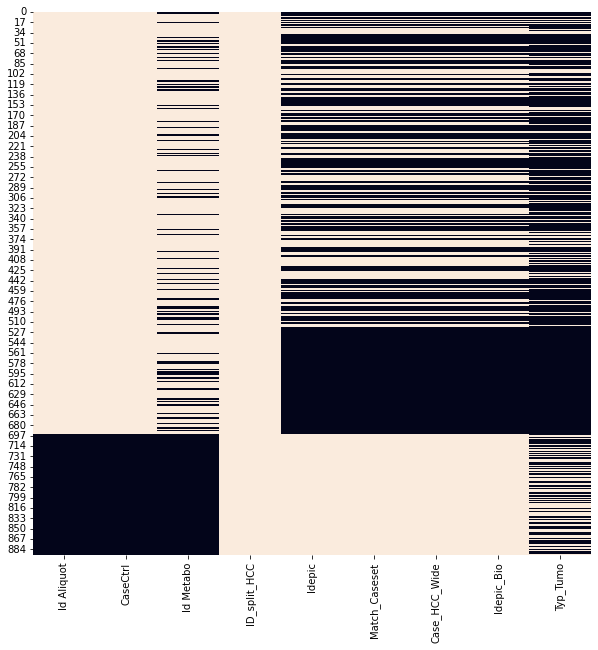

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(merge.notna(), cbar=False);

In [19]:
merge.to_csv(pwd + 'data/prepare_HCC_data/IDs_samples_merged.csv', index = False, header=True)